In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [41]:
with sqlite3.connect("../db.sqlite3") as conn:
    products_df = pd.read_sql_query("SELECT * FROM restaurant_product", conn)
    orders_df = pd.read_sql_query("SELECT * FROM restaurant_order", conn)
    order_items_df = pd.read_sql_query("SELECT * FROM restaurant_orderitem", conn)


combined_df = (
    order_items_df
    .merge(orders_df, right_on="id", left_on="order_id")
    .merge(products_df, right_on="id", left_on="product_id")
)
combined_df.set_index("id", inplace=True)
combined_df = combined_df.drop(columns=["id_x", "id_y", "order_id", "product_id"])
combined_df.to_csv("data.csv", index=False)
df = pd.read_csv("data.csv")

print(f"Number of rows: {len(combined_df)}")
df

Number of rows: 74818


,quantity,datetime,price,name
0,2,2019-08-03 20:25:00,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,8.95,Paneer Tikka Masala
...,...,...,...,...
74813,2,2016-05-18 18:53:00,17.95,House Red wine 75cl
74814,2,2016-05-14 19:28:00,17.95,House Red wine 75cl
74815,2,2016-05-10 13:18:00,17.95,House Red wine 75cl
74816,1,2016-04-07 19:04:00,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

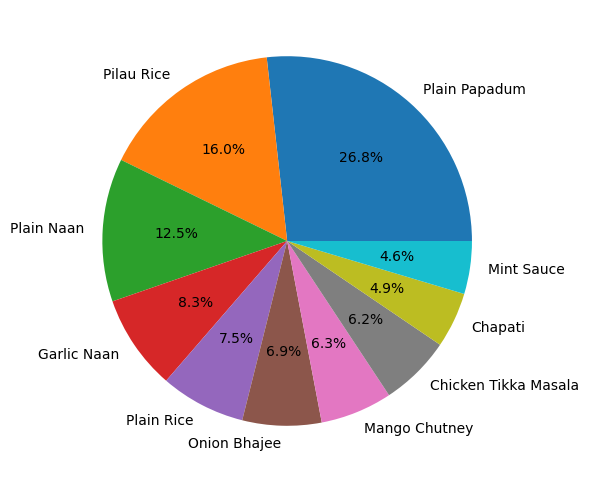

In [62]:
top_products = df.groupby("name")["quantity"].sum().reset_index()

top_10_products = top_products.nlargest(10, "quantity")

plt.figure(figsize=(8, 6))
plt.pie(top_10_products["quantity"], labels=top_10_products["name"], autopct="%1.1f%%")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

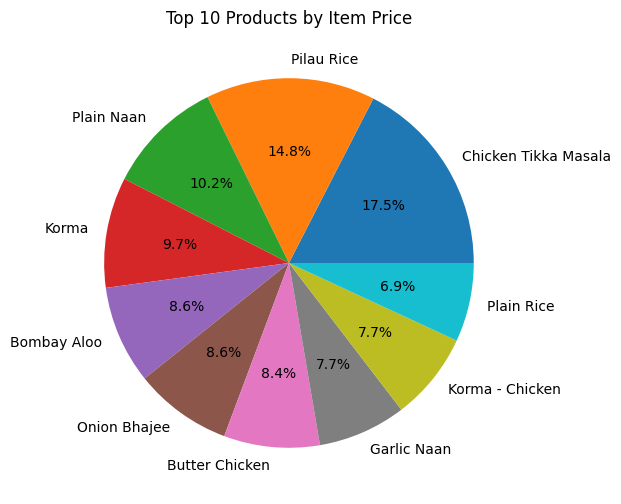

In [66]:
df["item_price"] = df["price"] * df["quantity"]

products_price = df.groupby("name")["item_price"].sum().reset_index()

top_10_products_price = products_price.nlargest(10, "item_price")

plt.figure(figsize=(8, 6))
plt.pie(top_10_products_price["item_price"], labels=top_10_products_price["name"], autopct="%1.1f%%")
plt.title("Top 10 Products by Item Price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

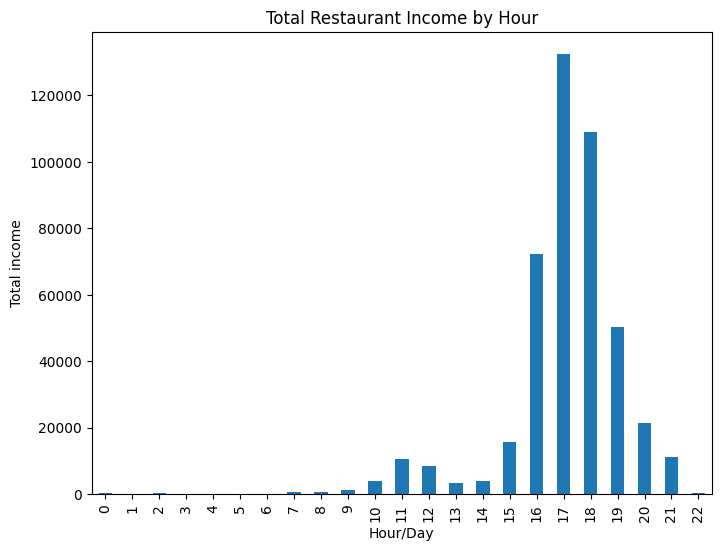

In [89]:
df["order_datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["order_datetime"].dt.hour
income_per_hour = df.groupby("order_hour")["item_price"].sum().reset_index()

plt.figure(figsize=(8, 6))
income_per_hour["item_price"].plot(kind="bar")
plt.xlabel("Hour/Day")
plt.ylabel("Total income")
plt.title("Total Restaurant Income by Hour")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

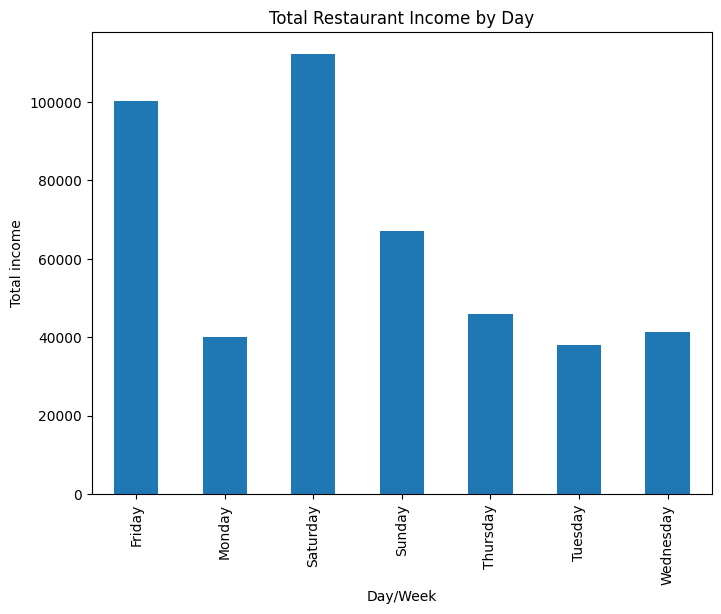

In [84]:
df["order_day_of_week"] = df["order_datetime"].dt.day_name()

income_per_day = df.groupby("order_day_of_week")["item_price"].sum()

plt.figure(figsize=(8, 6))
income_per_day.plot(kind="bar")
plt.xlabel("Day/Week")
plt.ylabel("Total income")
plt.title("Total Restaurant Income by Day")
plt.show()